In [106]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def fresnel_propTF(u1,L,lam,z):
    """ Propagation Transfer Function using Fresnel's approximation

    Args:
        u1: source plane field
        L:  width of the plane
        lam: wavelength of the monochromatic source
        z:  propagation distance
    

    Returns: u2 the observation plane field
    """
    
    m,n = u1.shape            #input array size
    dx = L/m                 #sample interval
    k = 2*np.pi/lam          #wavenumber
    fx = np.arange(-1/(2*dx),1/(2*dx),1/L,'float64')   #frequency co-ordinates
    fy = fx
    
    [FX,FY] = np.meshgrid(fx,fy)
    H = np.exp(-1j*np.pi*lam*z*(FX**2 + FY**2))*np.exp(1j*k*z)
    H = np.fft.fftshift(H)
    U1 = np.fft.fft2(np.fft.fftshift(u1))

    U2 = H*U1       
    u2 = np.fft.ifftshift(np.fft.ifft2(U2))
    
    return u2

def fresnel_propTF1D(u,L,lam,z):
    """ Propagation Transfer Function using Fresnel's approximation

    Args:
        u1: source plane field
        L:  width of the plane
        lam: wavelength of the monochromatic source
        z:  propagation distance
    

    Returns: u2 the observation plane field
    """
    
    m = u.shape[0]            #input array size
    dx = L/m                 #sample interval
    k = 2*np.pi/lam          #wavenumber
    fx = np.arange(-1/(2*dx),1/(2*dx),1/L,'float64')   #frequency co-ordinates
            
    H = np.exp(-1j*np.pi*lam*z*(fx**2))
    H = np.fft.fftshift(H)    
    U = np.fft.fft(np.fft.fftshift(u))

    U2 = H*U       
    u2 = np.fft.ifftshift(np.fft.ifft(U2))
    
    return u2

def rect(x):
    """ Function to create a rectangular pulse of unit amplitude and area

    Args:
        x: Input signal 

    Returns: Rectangular pulse of same length as x
    """
    return (0.5*(np.sign(x+0.5) - np.sign(x-0.5)));


def get_square_aperture(L=0.5,M=250,w=0.0051):
    """ Function that creates a square beam based on arguments provided
        Default parameters added
    Args:
        L: width of the Source Plane in m
        M: Number of Samples 
        lam: wavelength in m
        w: half width of the aperture in m
        z: propagation distance
        
    Usage:    
        get_square_beam(L,M,lam,w,z)
        
    Returns: u1 source plane field for scalar diffraction
    
    """
    dx1 = L/M
    x1 = np.arange(-L/2,L/2,dx1,'float64')
    y1 = x1    
    [X1,Y1] = np.meshgrid(x1,y1)  
    u1 = rect(X1/(2*w))*rect(Y1/(2*w))
    return u1


def get_grating_cos1D(L,M,lam,p):
    """ Function that creates a cosine diffraction grating 
        Default parameters added
    Args:
        L: width of the Source Plane
        M: Number of Samples 
        lam: wavelength
        w: half width of the aperture
        p: period of the cosine wave
        
    Usage:    
        get_grating_cos(L,M,lam,w,p)
    
    Returns: Cosine Grating transmittance field
    
    """
    dx = L/M
    x = np.arange(-L/2,L/2,dx,'float64')
    u = 0.5*(1+np.cos((2*np.pi*x)/p))
    return u


def get_grating_square1D(L,M,lam,p):
    """ Function that creates a cosine diffraction grating 
        Default parameters added
    Args:
        L: width of the Source Plane
        M: Number of Samples 
        lam: wavelength
        w: half width of the aperture
        p: period of the cosine wave
        
    Usage:    
        get_grating_cos(L,M,lam,w,p)
    
    Returns: Cosine Grating transmittance field
    
    """
    dx = L/M
    x = np.arange(-L/2,L/2,dx,'float64')
    ucomb = combApprox_discrete(np.int(p/dx), M)
    ucomb[0] = 0
    ucomb[1] = 0
    u = np.convolve(ucomb,rect(x/(p/2)),mode='same')
   
    return u

    
def combApprox_discrete(K, M):
    """
    This implementation of the comb function has been taken from the following website
    https://dspillustrations.com/pages/posts/misc/the-dirac-comb-and-its-fourier-transform.html
    
    Args:
    K: Comb Period
    M: Total Number of Samples
    
    Usage:    
    combApprox_discrete(K,M)
    
    Returns: The appropriate Comb Function
    
    """
    n = np.arange(M)
    sigSum = 0
    for k in range(K):
        part = np.exp(2j*np.pi*n*k/K)
        sigSum = sigSum + part
    return (sigSum.real/K)

def display_talbot_carpet(u,p,lam,L,M):
    
    dz = 0.001*(p**2)/lam
    z = np.arange(0,2*(p**2)/lam,dz)
    u2 = np.zeros([M,z.shape[0]],dtype='cfloat') 
    
    for i in range(z.shape[0]):
        temp = fresnel_propTF1D(u,L,lam,z[i])
        u2[:,i] = temp*np.conj(temp)
   
    u2 = np.absolute(u2)
    return u2

print('Done')

Done


In [108]:
# Beam Propagation Parameters
L = 0.5
M = 5000
lam = 0.5e-6
w = 0.1   #half width
p = 1e-2 

dx = L/M
x = np.arange(-L/2,L/2,dx,'float64')

u1 = get_grating_square1D(L,M,lam,p)
# u2 = fresnel_propTF1D(u1,L,lam,(1/2)*p*p/lam)
# # u3 = fresnel_propTF1D(u1,L,lam,1*p*p/lam)
# # u4 = fresnel_propTF1D(u1,L,lam,2*p*p/lam)

# I1 = np.abs(u1*np.conj(u1))
# I2 = np.abs(u2*np.conj(u2))
# I3 = np.abs(u3*np.conj(u3))
# I4 = np.abs(u4*np.conj(u4))

# plt.figure(figsize=(20,20))

# plt.subplot(221); plt.plot(I1); plt.title('Incident Field',fontsize=16);
# plt.xlabel('x',fontsize=14);plt.ylabel('Intensity',fontsize=14)

# plt.subplot(222); plt.plot(I2);plt.title('Propagated Field at z = ' + r'$\frac{1}{2}p^2/ \lambda $',fontsize=16); 
# plt.xlabel('x',fontsize=14);plt.ylabel('Intensity',fontsize=14)

# plt.subplot(223); plt.plot(I3[2000:3000]); plt.title('Propagated Field at z = ' + r'$p^2/ \lambda $',fontsize=16); 
# plt.xlabel('x',fontsize=14);plt.ylabel('Intensity',fontsize=14)

# plt.subplot(224); plt.plot(I4[2000:3000]); plt.title('Propagated Field at z = ' + r'$2p^2/ \lambda $',fontsize=16); 
# plt.xlabel('x',fontsize=14);plt.ylabel('Intensity',fontsize=14)

# print(np.sum(I1))
# print(np.sum(I2))
# print(np.sum(I3))
# print(np.sum(I4))


print('Done')

Done


Done


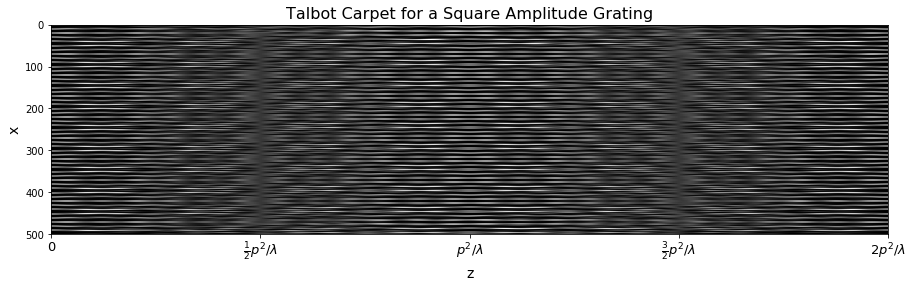

In [84]:
ui = get_grating_square1D(L,M,lam,p)
u2 = display_talbot_carpet(ui,p,lam,L,M)

plt.figure(figsize=(15,15))
plt.title('Talbot Carpet for a Square Amplitude Grating',fontsize = 16)
plt.imshow(u2,cmap='gray',interpolation='none',aspect='equal')   
plt.savefig('Talbot_Carpet_SqAmpGrating')
plt.xlabel('z',fontsize=14)
plt.ylabel('x',fontsize=14)
plt.xticks(np.arange(0,2000+250,500),('0',r'$\frac{1}{2}p^2/ \lambda $', r'$p^2/ \lambda $', r'$\frac{3}{2}p^2/ \lambda $', r'$2p^2/ \lambda $'),fontsize=13)

# ui = get_grating_cos1D(L,M,lam,p)
# u2 = display_talbot_carpet(ui,p,lam,L,M)

# plt.figure(figsize=(15,15))
# plt.title('Talbot Carpet for a Cosine Amplitude Grating',fontsize = 16)
# plt.imshow(u2[2000:3000,:],cmap='gray',interpolation='none',aspect='equal')   
# plt.savefig('Talbot_Carpet_CosAmpGrating')
# plt.xlabel('z',fontsize=14)
# plt.ylabel('x',fontsize=14)
# plt.xticks(np.arange(0,2000+250,500),('0',r'$\frac{1}{2}p^2/ \lambda $', r'$p^2/ \lambda $', r'$\frac{3}{2}p^2/ \lambda $', r'$2p^2/ \lambda $'),fontsize=13)


print('Done')

In [ ]:
# Simulating Wavefronts from a point source
# Beam Propagation Parameters
# Units are in meters
L = 0.5 
M = 5000
dx = L/M
lam = 0.5e-6
k = 2*np.pi/lam
z = 100000
p = 1e-2 

x2 = np.arange(-L/2,L/2,dx,'float64')
x1 = np.full(M,x2[M//2+1])
R = np.sqrt((x1-x2)**2 + (z)**2)
u1 = np.exp(1j*k*R)/(1j*R)
u1 = u1/np.max(np.abs(u1))

ui = get_grating_cos1D(L,M,lam,p)

plt.plot(x2,np.abs(u1*np.conj(u1)));plt.title('Incident Wavefront',fontsize=16);
plt.xlabel('x',fontsize=14);plt.ylabel('Intensity',fontsize=14)

u2 = display_talbot_carpet(u1,p,lam,L,M)
ax = plt.figure(figsize=(15,15))
plt.imshow(u2[2000:3000],cmap='gray',interpolation='none',aspect='equal',extent=(0,2000,3000,2000))   
plt.savefig('Talbot_Carpet_PointSource')
plt.xlabel('z')
plt.ylabel('x')
plt.xticks(np.arange(0,2000+250,500),('0',r'$\frac{1}{2}p^2/ \lambda $', r'$p^2/ \lambda $', r'$\frac{3}{2}p^2/ \lambda $', r'$2p^2/ \lambda $'),fontsize=13)

print('Done')
